# **Finding How The Data Is Distributed**


## Objectives


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [ ]:
## Write your code here
print("DataFrame Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types and Non-Null Counts:\n")
print(df.info())
print("\nStatistical Summary of Numeric Columns:\n")
print(df.describe())

DataFrame Shape: (65437, 114)

Column Names:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHave

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [ ]:
## Write your code here
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nRemaining missing values (if any):\n", df.isnull().sum()[df.isnull().sum() > 0])



Missing values per column:
 RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

Remaining missing values (if any):
 Series([], dtype: int64)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [ ]:
## Write your code here
print("Employment distribution:\n", df['Employment'].value_counts(dropna=False), "\n")
print("Job Satisfaction distribution:\n", df['JobSat'].value_counts(dropna=False), "\n")
print("Years of Professional Coding Experience distribution:\n", df['YearsCodePro'].value_counts(dropna=False).sort_index(ascending=True), "\n")

Employment distribution:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


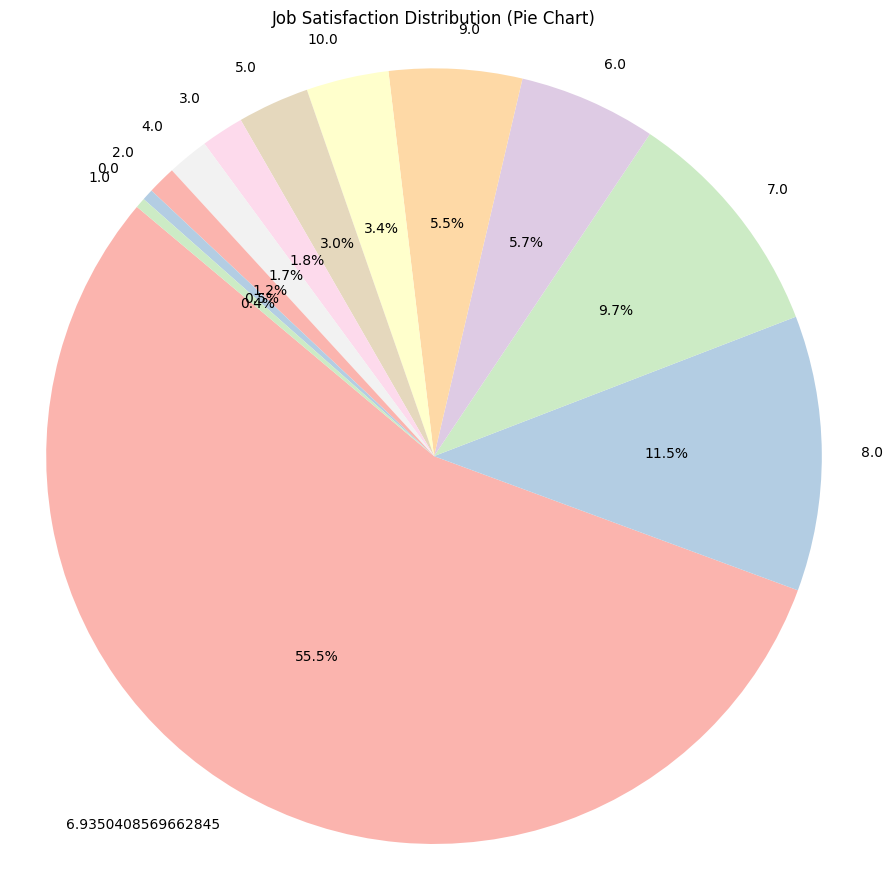

In [ ]:
## Write your code here

job_sat_counts = df['JobSat'].value_counts()

plt.figure(figsize=(9, 9))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Job Satisfaction Distribution (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<ipython-input-6-9e05cb2aa754>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['HaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
<ipython-input-6-9e05cb2aa754>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['WantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')


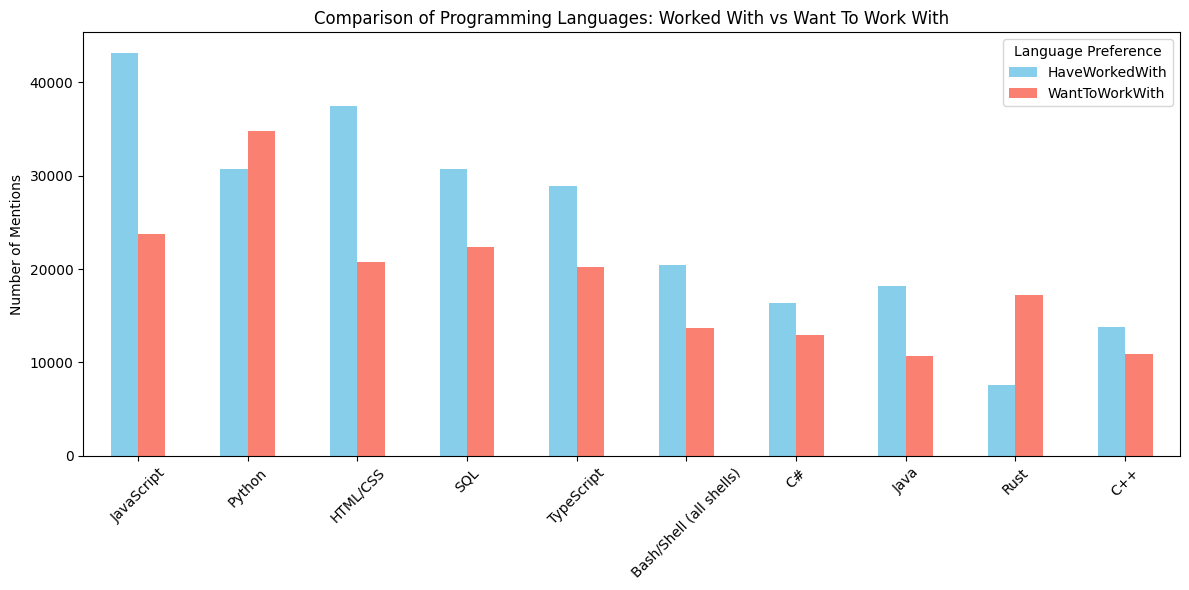

In [ ]:
## Write your code here
df['HaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df['WantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')

have_langs = df.explode('HaveWorkedWith')['HaveWorkedWith'].str.strip()
want_langs = df.explode('WantToWorkWith')['WantToWorkWith'].str.strip()

have_counts = have_langs.value_counts()
want_counts = want_langs.value_counts()

lang_compare = pd.DataFrame({'HaveWorkedWith': have_counts,'WantToWorkWith': want_counts}).fillna(0).astype(int)


top_langs = lang_compare.sum(axis=1).sort_values(ascending=False).head(10)
lang_compare_top = lang_compare.loc[top_langs.index]

lang_compare_top.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Comparison of Programming Languages: Worked With vs Want To Work With')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.legend(title='Language Preference')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


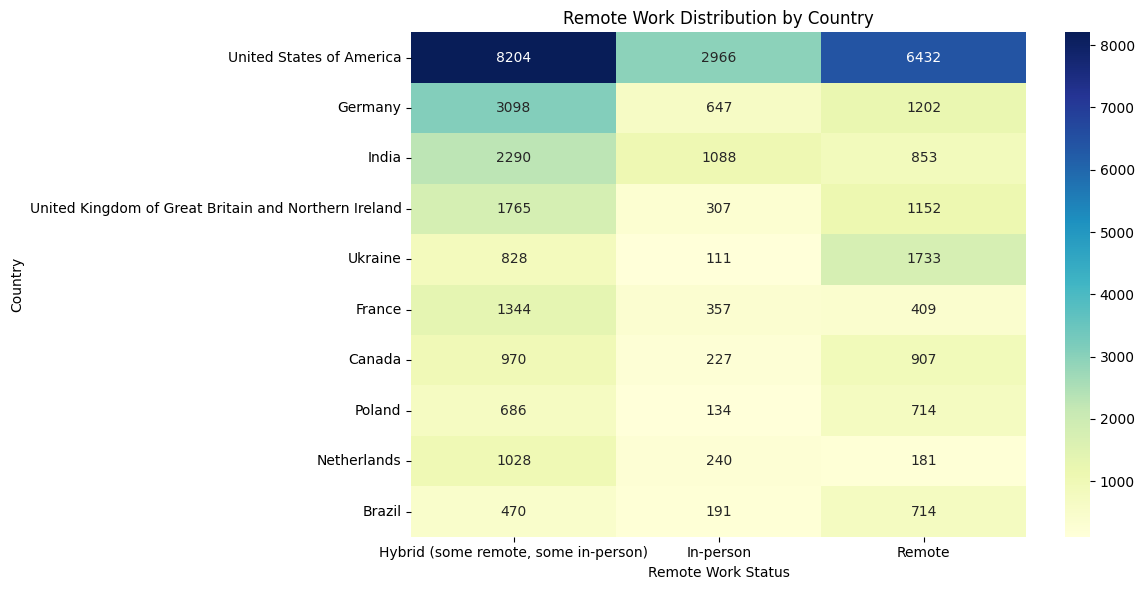

In [ ]:
## Write your code here
remote_by_country = pd.crosstab(df['Country'], df['RemoteWork'])

top_countries = df['Country'].value_counts().head(10).index
remote_by_country = remote_by_country.loc[top_countries]

plt.figure(figsize=(12, 6))
sns.heatmap(remote_by_country, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Remote Work Distribution by Country')
plt.xlabel('Remote Work Status')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [ ]:
## Write your code here
from scipy.stats import pearsonr, spearmanr
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

pearson_corr, _ = pearsonr(df['YearsCodePro'], df['JobSat'])
spearman_corr, _ = spearmanr(df['YearsCodePro'], df['JobSat'])

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")

Pearson Correlation: 0.070
Spearman Correlation: 0.150


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


<ipython-input-10-3947639454c7>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


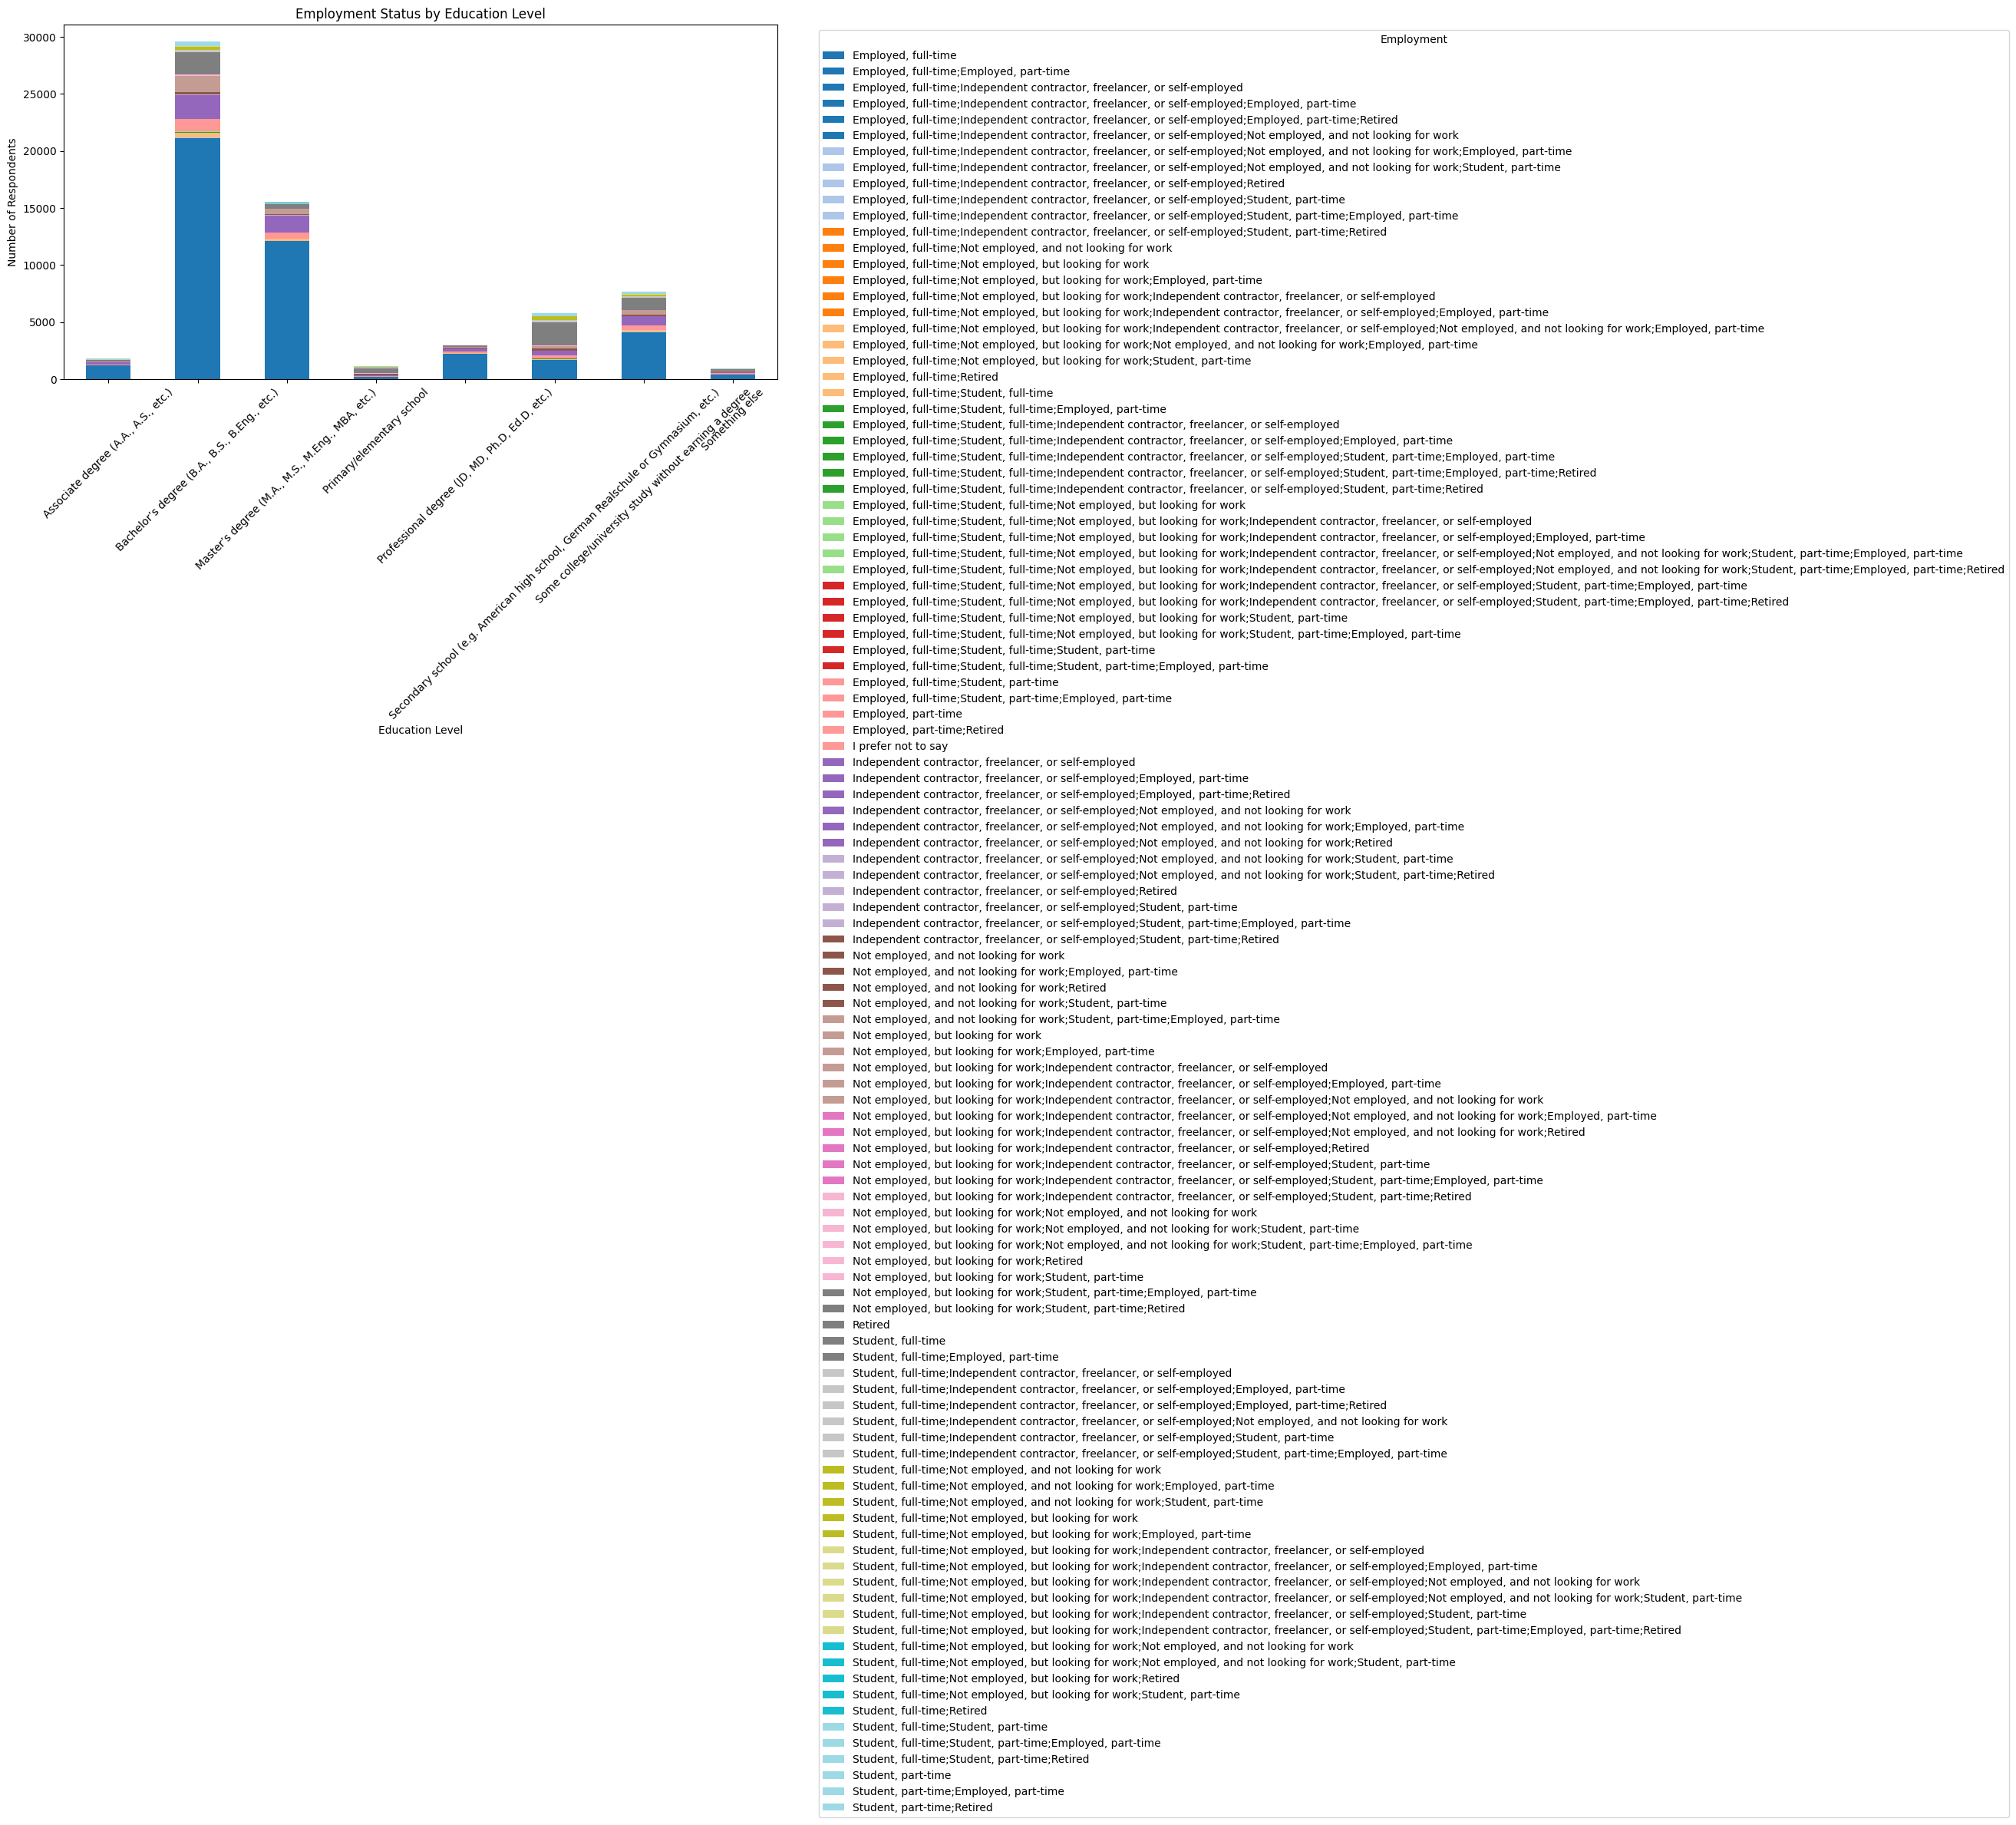

In [ ]:
## Write your code here
crosstab = pd.crosstab(df['EdLevel'], df['Employment'])


crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('modified_dataset.csv', index=False)
print("Modified dataset saved as 'modified_dataset.csv'")

Modified dataset saved as 'modified_dataset.csv'
